In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as unc  
import uncertainties.unumpy as unumpy

In [2]:
energy_list = []

e1 = np.loadtxt('CHARMM27/WC-energy.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])

e1 = np.loadtxt('CHARMM27/HG-energy.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])

e1 = np.loadtxt('CHARMM36/WC-energy.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])

e1 = np.loadtxt('CHARMM36/HG-energy.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])

e1 = np.loadtxt('AMBER_bsc_0/WC-energy.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])

e1 = np.loadtxt('AMBER_bsc_0/HG-energy.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])

e1 = np.loadtxt('AMBER_bsc_1/WC-energy.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])

e1 = np.loadtxt('AMBER_bsc_1/HG-energy.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])


print(energy_list)

[[-10.9501187243027, 0.025701291421495607], [-11.138575497277474, 0.04107465096590597], [-11.123313268140903, 0.025028258571360644], [-11.256973030336704, 0.034073671129053906], [-10.615655028336484, 0.025091337346806183], [-12.036651427936437, 0.03068371704935967], [-10.461382253583732, 0.024666950403849145], [-12.316911267918657, 0.029282657774275158]]


In [3]:
forceField = ['CHARMM27_WC','CHARMM27_HG','CHARMM36_WC','CHARMM36_HG','AMBER_bsc_0_WC','AMBER_bsc_0_HG','AMBER_bsc_1_WC','AMBER_bsc_1_HG']
energy = np.array(energy_list).T[0]
error_bars = np.array(energy_list).T[1]

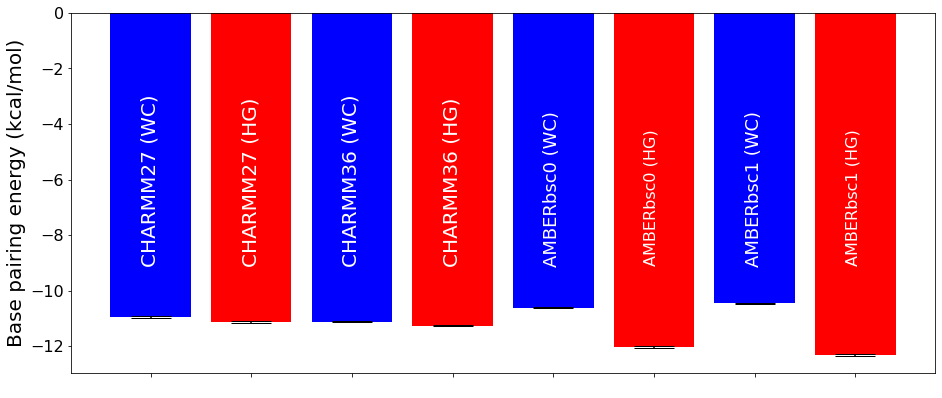

In [4]:
colors = ['b','r','b','r','b','r','b','r']

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(forceField,energy,yerr=error_bars,capsize=20.0,color=colors)
#plt.ylim(14)
plt.yticks(fontsize=16)
plt.xticks(color='white')
plt.ylabel('Base pairing energy (kcal/mol)',fontsize=20)
plt.text(-0.1,-9,'CHARMM27 (WC)',fontsize=20,rotation='vertical',color='white')
plt.text(0.9,-9,'CHARMM27 (HG)',fontsize=20,rotation='vertical',color='white')
plt.text(1.9,-9,'CHARMM36 (WC)',fontsize=20,rotation='vertical',color='white')
plt.text(2.9,-9,'CHARMM36 (HG)',fontsize=20,rotation='vertical',color='white')
plt.text(3.9,-9,'AMBERbsc0 (WC)',fontsize=18,rotation='vertical',color='white')
plt.text(4.9,-9,'AMBERbsc0 (HG)',fontsize=16,rotation='vertical',color='white')
plt.text(5.9,-9,'AMBERbsc1 (WC)',fontsize=18,rotation='vertical',color='white')
plt.text(6.9,-9,'AMBERbsc1 (HG)',fontsize=16,rotation='vertical',color='white')
#plt.tight_layout()
#plt.show()
plt.savefig('energy-plot-figures/base-pairing-energy.pdf',bbox_inches='tight')

In [5]:
energy_list = np.array(energy_list)
en_wc = np.asarray([energy_list[0,0],energy_list[2,0],energy_list[4,0],energy_list[6,0]])
en_wc_err = np.asarray([energy_list[0,1],energy_list[2,1],energy_list[4,1],energy_list[6,1]])
en_hg = np.asarray([energy_list[1,0],energy_list[3,0],energy_list[5,0],energy_list[7,0]])
en_hg_err = np.asarray([energy_list[1,1],energy_list[3,1],energy_list[5,1],energy_list[7,1]])

wc = unumpy.uarray(( en_wc, en_wc_err ))
hg = unumpy.uarray(( en_hg, en_hg_err ))

diff = hg - wc

mean_diff = unumpy.nominal_values(diff)
err_diff = unumpy.std_devs(diff)

<ipython-input-5-5d8ffb578d50>:7: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
  wc = unumpy.uarray(( en_wc, en_wc_err ))
<ipython-input-5-5d8ffb578d50>:8: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
  hg = unumpy.uarray(( en_hg, en_hg_err ))


In [6]:
print(mean_diff,err_diff)

[-0.18845677 -0.13365976 -1.4209964  -1.85552901] [0.0484529  0.04227799 0.03963667 0.0382875 ]


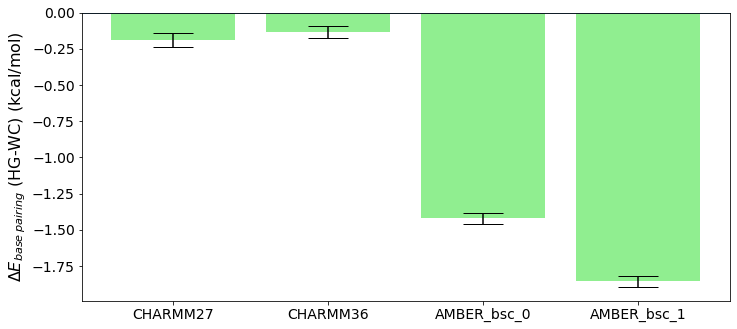

In [7]:
#difference = [e2-e1, e4-e3, e6-e5, e8-e7]
forceFF = ['CHARMM27','CHARMM36','AMBER_bsc_0','AMBER_bsc_1']

fig = plt.figure(figsize=(9,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(forceFF,mean_diff,yerr=err_diff,capsize=20,color='lightgreen')
#plt.ylim(15)
plt.yticks(fontsize=14)
plt.ylabel('$\Delta E_{base \; pairing}$ (HG-WC) (kcal/mol)',fontsize=16)
plt.xticks(fontsize=14)
plt.axhline(y=0.0)
#plt.tight_layout()
#plt.show()
plt.savefig('energy-plot-figures/base-pairing-energy-difference.pdf',bbox_inches='tight')

In [8]:
energy_list = []

e1 = np.loadtxt('CHARMM27/WC-energy-all.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])

e1 = np.loadtxt('CHARMM27/HG-energy-all.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])

e1 = np.loadtxt('CHARMM36/WC-energy-all.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])

e1 = np.loadtxt('CHARMM36/HG-energy-all.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])

e1 = np.loadtxt('AMBER_bsc_0/WC-energy-all.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])

e1 = np.loadtxt('AMBER_bsc_0/HG-energy-all.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])

e1 = np.loadtxt('AMBER_bsc_1/WC-energy-all.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])

e1 = np.loadtxt('AMBER_bsc_1/HG-energy-all.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])


print(energy_list)

[[-33.1827618735415, 0.10611821612958272], [-30.846290954550508, 0.13652986165091233], [-32.866245227247475, 0.10863388839866922], [-31.843662473608177, 0.12085083333485945], [-113.89086946327369, 0.10676655056731424], [-118.73647300811203, 0.11705797263103594], [-114.97644322702524, 0.1036938160414006], [-116.4922448494277, 0.13184697025890763]]


In [9]:
forceField = ['CHARMM27_WC','CHARMM27_HG','CHARMM36_WC','CHARMM36_HG','AMBER_bsc_0_WC','AMBER_bsc_0_HG','AMBER_bsc_1_WC','AMBER_bsc_1_HG']
energy = np.array(energy_list).T[0]
error_bars = np.array(energy_list).T[1]

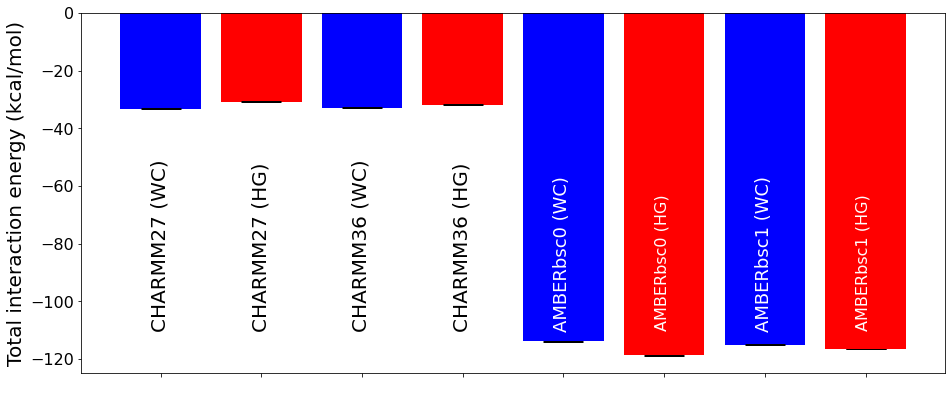

In [10]:
colors = ['b','r','b','r','b','r','b','r']

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(forceField,energy,yerr=error_bars,capsize=20.0,color=colors)
#plt.ylim(14)
plt.yticks(fontsize=16)
plt.xticks(color='white')
plt.ylabel('Total interaction energy (kcal/mol)',fontsize=20)
plt.text(-0.1,-109,'CHARMM27 (WC)',fontsize=20,rotation='vertical',color='k')
plt.text(0.9,-109,'CHARMM27 (HG)',fontsize=20,rotation='vertical',color='k')
plt.text(1.9,-109,'CHARMM36 (WC)',fontsize=20,rotation='vertical',color='k')
plt.text(2.9,-109,'CHARMM36 (HG)',fontsize=20,rotation='vertical',color='k')
plt.text(3.9,-109,'AMBERbsc0 (WC)',fontsize=18,rotation='vertical',color='white')
plt.text(4.9,-109,'AMBERbsc0 (HG)',fontsize=16,rotation='vertical',color='white')
plt.text(5.9,-109,'AMBERbsc1 (WC)',fontsize=18,rotation='vertical',color='white')
plt.text(6.9,-109,'AMBERbsc1 (HG)',fontsize=16,rotation='vertical',color='white')
#plt.tight_layout()
#plt.show()
plt.savefig('energy-plot-figures/bp-whole-system-energy.pdf',bbox_inches='tight')

In [11]:
energy_list = np.array(energy_list)
en_wc = np.asarray([energy_list[0,0],energy_list[2,0],energy_list[4,0],energy_list[6,0]])
en_wc_err = np.asarray([energy_list[0,1],energy_list[2,1],energy_list[4,1],energy_list[6,1]])
en_hg = np.asarray([energy_list[1,0],energy_list[3,0],energy_list[5,0],energy_list[7,0]])
en_hg_err = np.asarray([energy_list[1,1],energy_list[3,1],energy_list[5,1],energy_list[7,1]])

wc = unumpy.uarray(( en_wc, en_wc_err ))
hg = unumpy.uarray(( en_hg, en_hg_err ))

diff = hg - wc

mean_diff = unumpy.nominal_values(diff)
err_diff = unumpy.std_devs(diff)

print(mean_diff,err_diff)

[ 2.33647092  1.02258275 -4.84560354 -1.51580162] [0.17292044 0.16249999 0.15843505 0.16773798]


<ipython-input-11-24cf57e80195>:7: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
  wc = unumpy.uarray(( en_wc, en_wc_err ))
<ipython-input-11-24cf57e80195>:8: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
  hg = unumpy.uarray(( en_hg, en_hg_err ))


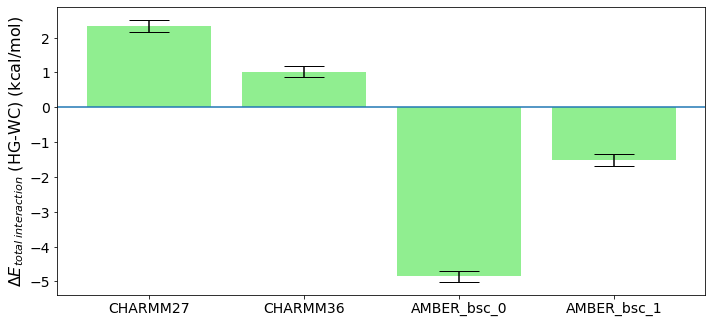

In [12]:
#difference = [e2-e1, e4-e3, e6-e5, e8-e7]
forceFF = ['CHARMM27','CHARMM36','AMBER_bsc_0','AMBER_bsc_1']

fig = plt.figure(figsize=(9,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(forceFF,mean_diff,yerr=err_diff,capsize=20,color='lightgreen')
#plt.ylim(15)
plt.yticks(fontsize=14)
plt.ylabel('$\Delta E_{total \; interaction}$ (HG-WC) (kcal/mol)',fontsize=16)
plt.xticks(fontsize=14)
plt.axhline(y=0.0)
#plt.tight_layout()
#plt.show()
plt.savefig('energy-plot-figures/bp-whole-system-energy-difference.pdf',bbox_inches='tight')

In [13]:
energy_list = []

e1 = np.loadtxt('CHARMM27/WC-pi-stacking-energy.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])

e1 = np.loadtxt('CHARMM27/HG-pi-stacking-energy.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])

e1 = np.loadtxt('CHARMM36/WC-pi-stacking-energy.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])

e1 = np.loadtxt('CHARMM36/HG-pi-stacking-energy.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])

e1 = np.loadtxt('AMBER_bsc_0/WC-pi-stacking-energy.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])

e1 = np.loadtxt('AMBER_bsc_0/HG-pi-stacking-energy.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])

e1 = np.loadtxt('AMBER_bsc_1/WC-pi-stacking-energy.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])

e1 = np.loadtxt('AMBER_bsc_1/HG-pi-stacking-energy.dat')

energy_list.append([np.mean(e1[1000:-1,4]),(1.96/np.sqrt(9000))*np.std(e1[1000:-1,4])])


print(energy_list)

[[-31.43565097233026, 0.047786726096839906], [-31.162134948327598, 0.04577776507671115], [-30.833368885431714, 0.047574168455582364], [-30.981912112456943, 0.04596513639342166], [-39.63914589398822, 0.05799054343952263], [-43.87656749638849, 0.061847938043332315], [-39.66449024336038, 0.05701764424654827], [-42.658675030558946, 0.06661418215088113]]


In [14]:
forceField = ['CHARMM27_WC','CHARMM27_HG','CHARMM36_WC','CHARMM36_HG','AMBER_bsc_0_WC','AMBER_bsc_0_HG','AMBER_bsc_1_WC','AMBER_bsc_1_HG']
energy = np.array(energy_list).T[0]
error_bars = np.array(energy_list).T[1]

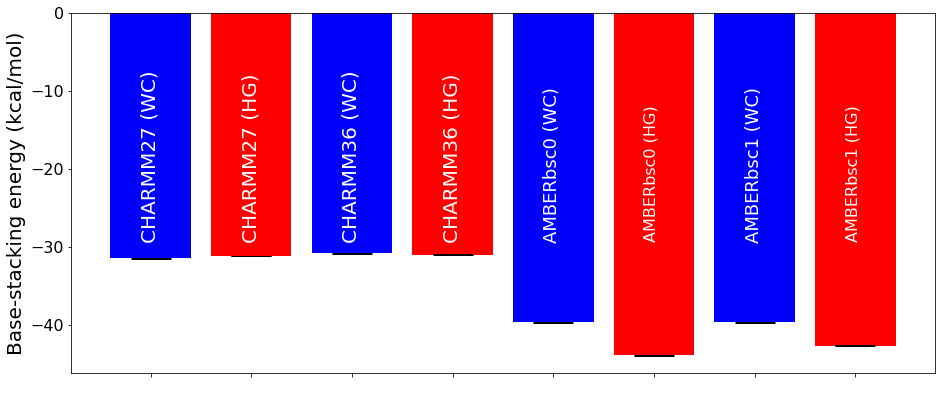

In [18]:
colors = ['b','r','b','r','b','r','b','r']

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(forceField,energy,yerr=error_bars,capsize=20.0,color=colors)
#plt.ylim(14)
plt.yticks(fontsize=16)
plt.xticks(color='white')
plt.ylabel('Base-stacking energy (kcal/mol)',fontsize=20)
plt.text(-0.1,-29,'CHARMM27 (WC)',fontsize=20,rotation='vertical',color='white')
plt.text(0.9,-29,'CHARMM27 (HG)',fontsize=20,rotation='vertical',color='white')
plt.text(1.9,-29,'CHARMM36 (WC)',fontsize=20,rotation='vertical',color='white')
plt.text(2.9,-29,'CHARMM36 (HG)',fontsize=20,rotation='vertical',color='white')
plt.text(3.9,-29,'AMBERbsc0 (WC)',fontsize=18,rotation='vertical',color='white')
plt.text(4.9,-29,'AMBERbsc0 (HG)',fontsize=16,rotation='vertical',color='white')
plt.text(5.9,-29,'AMBERbsc1 (WC)',fontsize=18,rotation='vertical',color='white')
plt.text(6.9,-29,'AMBERbsc1 (HG)',fontsize=16,rotation='vertical',color='white')
#plt.tight_layout()
#plt.show()
plt.savefig('energy-plot-figures/pi-stacking-energy.pdf',bbox_inches='tight')

In [16]:
energy_list = np.array(energy_list)
en_wc = np.asarray([energy_list[0,0],energy_list[2,0],energy_list[4,0],energy_list[6,0]])
en_wc_err = np.asarray([energy_list[0,1],energy_list[2,1],energy_list[4,1],energy_list[6,1]])
en_hg = np.asarray([energy_list[1,0],energy_list[3,0],energy_list[5,0],energy_list[7,0]])
en_hg_err = np.asarray([energy_list[1,1],energy_list[3,1],energy_list[5,1],energy_list[7,1]])

wc = unumpy.uarray(( en_wc, en_wc_err ))
hg = unumpy.uarray(( en_hg, en_hg_err ))

diff = hg - wc

mean_diff = unumpy.nominal_values(diff)
err_diff = unumpy.std_devs(diff)
print(mean_diff,err_diff)

[ 0.27351602 -0.14854323 -4.2374216  -2.99418479] [0.06617534 0.06615206 0.08478249 0.08768387]


<ipython-input-16-064e00dc2dc1>:7: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
  wc = unumpy.uarray(( en_wc, en_wc_err ))
<ipython-input-16-064e00dc2dc1>:8: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
  hg = unumpy.uarray(( en_hg, en_hg_err ))


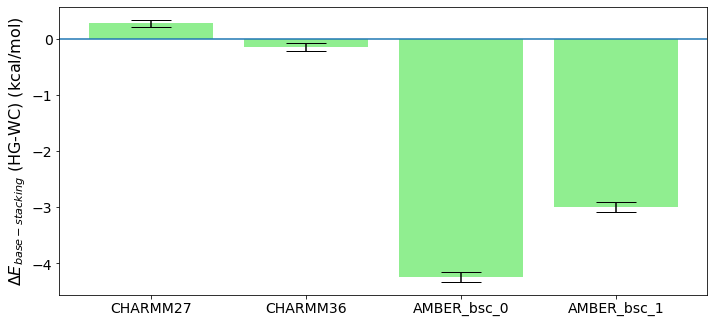

In [17]:
#difference = [e2-e1, e4-e3, e6-e5, e8-e7]
forceFF = ['CHARMM27','CHARMM36','AMBER_bsc_0','AMBER_bsc_1']

fig = plt.figure(figsize=(9,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(forceFF,mean_diff,yerr=err_diff,capsize=20,color='lightgreen')
#plt.ylim(15)
plt.yticks(fontsize=14)
plt.ylabel('$\Delta E_{base-stacking}$ (HG-WC) (kcal/mol)',fontsize=16)
plt.xticks(fontsize=14)
plt.axhline(y=0.0)
#plt.tight_layout()
#plt.show()
plt.savefig('energy-plot-figures/pi-stacking-energy-difference.pdf',bbox_inches='tight')